# Originial idea

- Load the data
- Classify the data using catboost
- Label the data which is TP and TN as 1 and the rest as 0
- Check if this can be again classified and check the accuracy
- If the theory works proceed else try Decition Trees and try again

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv("../../data/train.csv")
df_train.drop(columns=["id"], inplace=True)

In [3]:
X = df_train.drop(columns=["defects"])
y = df_train["defects"]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
from catboost import CatBoostClassifier, Pool

In [6]:
train_dataset = Pool(X_train, y_train, feature_names=list(X_train.columns))

In [7]:
model_params = {
    'iterations': 10, 
    'loss_function': 'Logloss',
    'train_dir': 'crossentropy',
    'allow_writing_files': False,
    'random_seed': 42,
}

model = CatBoostClassifier(**model_params)

In [8]:
model.fit(train_dataset, verbose=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.5
0:	learn: 0.4888379	total: 151ms	remaining: 1.36s
1:	learn: 0.4478919	total: 166ms	remaining: 665ms
2:	learn: 0.4380120	total: 183ms	remaining: 428ms
3:	learn: 0.4335788	total: 199ms	remaining: 298ms
4:	learn: 0.4321998	total: 215ms	remaining: 215ms
5:	learn: 0.4313353	total: 231ms	remaining: 154ms
6:	learn: 0.4307874	total: 246ms	remaining: 105ms
7:	learn: 0.4303522	total: 260ms	remaining: 65ms
8:	learn: 0.4300671	total: 276ms	remaining: 30.7ms
9:	learn: 0.4293575	total: 291ms	remaining: 0us


In [9]:
print('CatBoost model is fitted: ' + str(model.is_fitted()))
print('CatBoost model parameters:')
print(model.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 10, 'loss_function': 'Logloss', 'random_seed': 42, 'train_dir': 'crossentropy', 'allow_writing_files': False}


In [10]:
result = model.predict(X)

In [11]:
result

array(['False', 'False', 'False', ..., 'False', 'False', 'True'],
      dtype=object)

In [12]:
from sklearn import metrics

In [13]:
metrics.confusion_matrix(y, result.astype(bool))

array([[    0, 78699],
       [    0, 23064]], dtype=int64)

In [14]:
import matplotlib.pyplot as plt

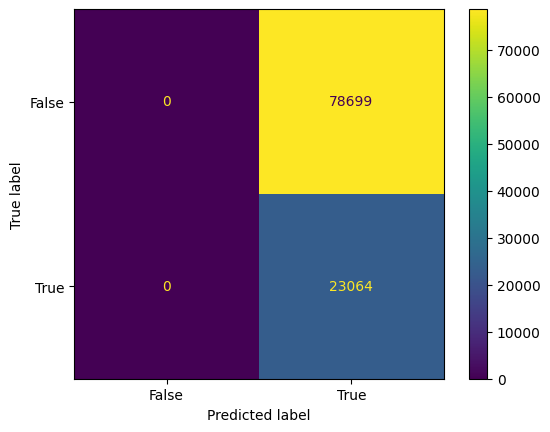

In [124]:
confusion_matrix = metrics.confusion_matrix(y, result.astype(bool))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [125]:
metrics.accuracy_score(y, result.astype(bool))

0.22664426166681406